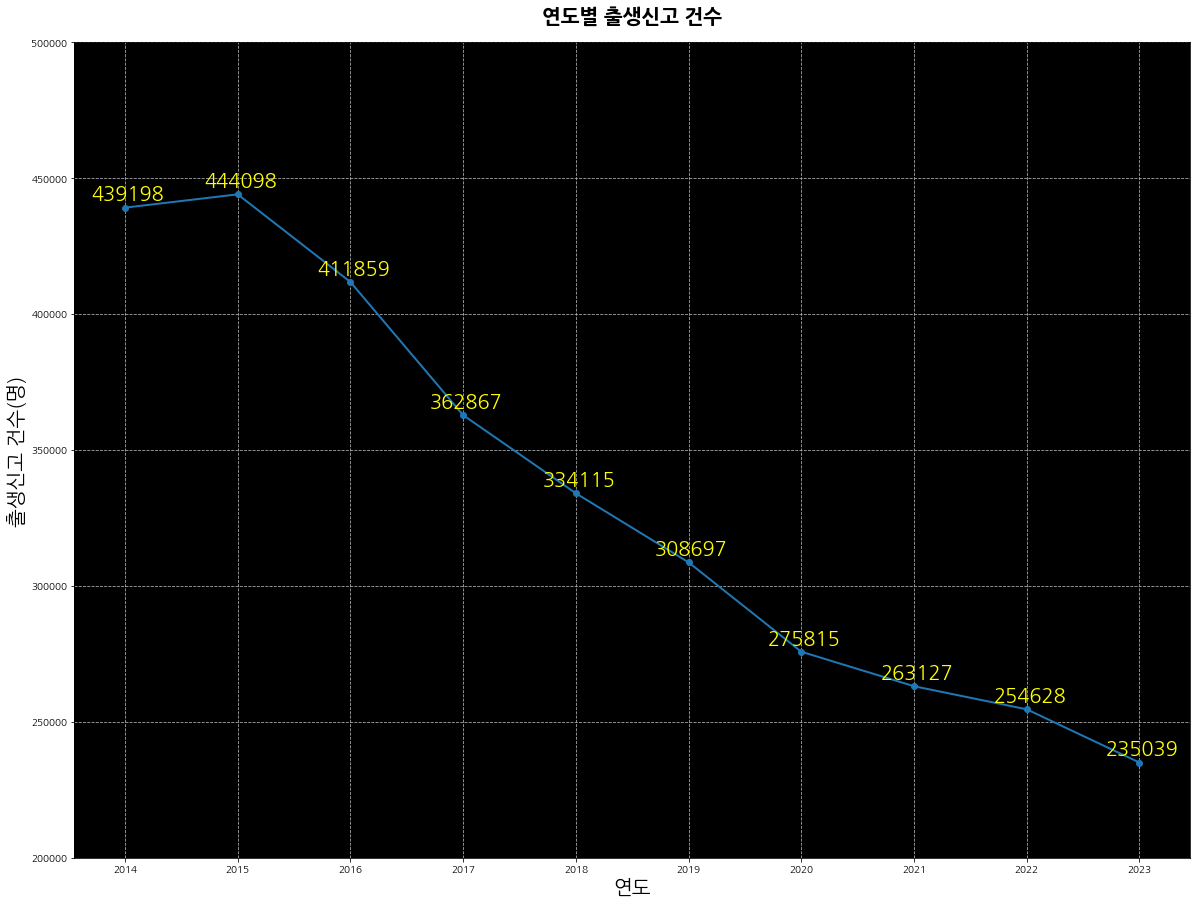

,연도,전국,서울특별시 (1100000000),부산광역시 (2600000000),대구광역시 (2700000000),인천광역시 (2800000000),광주광역시 (2900000000),대전광역시 (3000000000),울산광역시 (3100000000),세종특별자치시 (3600000000),경기도 (4100000000),강원도 (4200000000),강원특별자치도 (5100000000),충청북도 (4300000000),충청남도 (4400000000),전라북도 (4500000000),전라남도 (4600000000),경상북도 (4700000000),경상남도 (4800000000),제주특별자치도 (5000000000)
0,2014,439198,"84,223","26,412","19,509","26,115","12,793","14,054","11,602","1,343","113,397","10,775",0,"13,562","18,370","14,340","14,919","22,208","30,020","5,556"
1,2015,444098,"84,184","26,979","19,665","25,706","12,634","13,943","11,856","2,684","115,128","11,023",0,"13,775","18,840","14,289","15,314","22,645","29,755","5,678"
2,2016,411859,"76,718","25,295","18,511","23,865","11,740","12,577","11,030","3,327","107,305","10,208",0,"12,906","17,487","12,913","14,167","20,829","27,448","5,533"
3,2017,362867,"66,282","21,796","16,185","20,804","10,281","11,006","9,562","3,502","95,547","9,127",0,"11,524","15,807","11,492","12,532","18,211","24,138","5,071"
4,2018,334115,"59,553","19,692","14,674","20,395","9,345","9,572","8,285","3,793","90,144","8,494",0,"10,843","14,726","10,240","11,412","16,441","21,645","4,861"
5,2019,308697,"54,782","17,382","13,465","18,902","8,461","8,638","7,637","3,895","85,217","8,453",0,"9,362","13,467","9,078","11,053","14,790","19,570","4,545"
6,2020,275815,"48,055","15,294","11,351","16,240","7,410","7,591","6,711","3,500","78,587","7,916",0,"8,748","12,123","8,318","9,859","13,045","17,053","4,014"
7,2021,263127,"45,999","14,545","10,721","15,122","8,040","7,464","6,169","3,592","76,946","7,417",0,"8,330","11,072","7,559","8,567","12,158","15,629","3,797"
8,2022,254628,"43,741","14,432","10,337","14,786","7,521","7,824","5,509","3,295","77,090","7,429",0,"7,576","10,438","7,191","8,027","11,528","14,265","3,639"
9,2023,235039,"40,654","13,172","9,584","13,898","6,246","7,294","5,145","2,802","70,541","3,030","3,776","7,693","9,586","6,692","7,933","10,470","13,244","3,279"


In [1]:
# 출생신고 - 출산율

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 부르기
df50=pd.read_csv('2014_2023_주민등록인구기타현황(출생등록)_연간.csv',encoding='cp949')
df50

# Cleansing & Fixing
for i in range(2014,2024):
    df50=df50.drop(columns=f'{i}년_남자인구수')
    df50=df50.drop(columns=f'{i}년_여자인구수')

df50=df50.T
df50=df50.rename(columns=df50.iloc[0]).reset_index().drop([0],axis=0).reset_index().drop('level_0',axis=1)
df50
df50=df50.rename(columns={'index':'연도'})
df50=df50.set_index(keys='연도')

for j in range(2014,2024):
    df50=df50.rename(index={f'{j}년_계':j})

df50=df50.reset_index()
df50=df50.astype({'연도':'object'})
df50=df50.rename(columns={'전국  (1000000000)':'전국'})
df50
df50['전국']=df50['전국'].str.replace(',','').astype(int)

# 한글 폰트
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# 시각화
plt.figure(figsize=(20,15))
plt.title("연도별 출생신고 건수",fontsize=20, pad=20,fontweight='bold')
plt.xlabel('연도',fontsize=20)
plt.ylabel('출생신고 건수(명)',fontsize=20)

plt.plot(df50['연도'],df50['전국'],\
         marker='o',linewidth=2)

plt.xticks(range(2014,2024,1))
plt.yticks([200000,250000,300000,350000,400000,450000,500000])
ax = plt.gca()
ax.set_facecolor('black')
plt.grid(linestyle = '--')

# 주석 달기
for year, num in df50.iloc[:,[0,1]].values:
    plt.annotate(num,(year,num),xytext=(3,8),textcoords='offset points',fontsize=20,ha='center',color='yellow')

plt.savefig('연도별 출생신고 건수.png')
plt.savefig('연도별 출생신고 건수.jpg')
plt.show()

df50